In [40]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
%matplotlib inline
import os


# 2.a - Load and Preprocess Data

In [31]:
vstable = pd.read_csv("bank_data.csv", index_col=0)
vstable

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
id,,,,,,,,,,,
ID12101,48,17546.00,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
ID12102,40,30085.10,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
ID12103,51,16575.40,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
ID12104,23,20375.40,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
ID12105,57,50576.30,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO
ID12106,57,37869.60,2,FEMALE,TOWN,YES,NO,YES,YES,NO,YES
ID12107,22,8877.07,0,MALE,RURAL,NO,NO,NO,YES,NO,YES
ID12108,58,24946.60,0,MALE,TOWN,YES,YES,YES,YES,NO,NO
ID12109,37,25304.30,2,FEMALE,SUBURBAN,YES,YES,NO,NO,NO,NO


In [61]:
vs = np.genfromtxt("bank_data.csv", delimiter=",", names=True, dtype=('|S7', int, float, int, '|S6', '|S10', '|S3', '|S3', '|S3', '|S3', '|S3', '|S3'))
vs = vs[['age', 'income', 'children', 'gender', 'region', 'married', 'car', 'savings_acct', 'current_acct', 'mortgage', 'pep']]

In [62]:
vs_records = vs[['age', 'income', 'children', 'gender', 'region', 'married', 'car', 'savings_acct', 'current_acct', 'mortgage']]
vs_records

array([(48, 17546.0, 1, 'FEMALE', 'INNER_CITY', 'NO', 'NO', 'NO', 'NO', 'NO'),
       (40, 30085.1, 3, 'MALE', 'TOWN', 'YES', 'YES', 'NO', 'YES', 'YES'),
       (51, 16575.4, 0, 'FEMALE', 'INNER_CITY', 'YES', 'YES', 'YES', 'YES', 'NO'),
       (23, 20375.4, 3, 'FEMALE', 'TOWN', 'YES', 'NO', 'NO', 'YES', 'NO'),
       (57, 50576.3, 0, 'FEMALE', 'RURAL', 'YES', 'NO', 'YES', 'NO', 'NO'),
       (57, 37869.6, 2, 'FEMALE', 'TOWN', 'YES', 'NO', 'YES', 'YES', 'NO'),
       (22, 8877.07, 0, 'MALE', 'RURAL', 'NO', 'NO', 'NO', 'YES', 'NO'),
       (58, 24946.6, 0, 'MALE', 'TOWN', 'YES', 'YES', 'YES', 'YES', 'NO'),
       (37, 25304.3, 2, 'FEMALE', 'SUBURBAN', 'YES', 'YES', 'NO', 'NO', 'NO'),
       (54, 24212.1, 2, 'MALE', 'TOWN', 'YES', 'YES', 'YES', 'YES', 'NO'),
       (66, 59803.9, 0, 'FEMALE', 'TOWN', 'YES', 'NO', 'YES', 'YES', 'NO'),
       (52, 26658.8, 0, 'FEMALE', 'INNER_CITY', 'NO', 'YES', 'YES', 'YES', 'YES'),
       (44, 15735.8, 1, 'FEMALE', 'TOWN', 'YES', 'NO', 'YES', 'YES', 'YES')

In [63]:
vs_names = vs_records.dtype.names
vs_names

('age',
 'income',
 'children',
 'gender',
 'region',
 'married',
 'car',
 'savings_acct',
 'current_acct',
 'mortgage')

In [64]:
vs_target = vs['pep']
vs_target

array(['YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO',
       'NO', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO',
       'YES', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO',
       'YES', 'NO', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'NO', 'NO',
       'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES',
       'NO', 'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'NO',
       'YES', 'YES', 'YES', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'YES',
       'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO',
       'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'YES',
       'YES', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES',
       'YES', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO',
       'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'N

In [65]:
vs_dict = [dict(zip(vs_names, record)) for record in vs_records]
vs_dict[:5]

[{'age': 48,
  'car': 'NO',
  'children': 1,
  'current_acct': 'NO',
  'gender': 'FEMALE',
  'income': 17546.0,
  'married': 'NO',
  'mortgage': 'NO',
  'region': 'INNER_CITY',
  'savings_acct': 'NO'},
 {'age': 40,
  'car': 'YES',
  'children': 3,
  'current_acct': 'YES',
  'gender': 'MALE',
  'income': 30085.099999999999,
  'married': 'YES',
  'mortgage': 'YES',
  'region': 'TOWN',
  'savings_acct': 'NO'},
 {'age': 51,
  'car': 'YES',
  'children': 0,
  'current_acct': 'YES',
  'gender': 'FEMALE',
  'income': 16575.400000000001,
  'married': 'YES',
  'mortgage': 'NO',
  'region': 'INNER_CITY',
  'savings_acct': 'YES'},
 {'age': 23,
  'car': 'NO',
  'children': 3,
  'current_acct': 'YES',
  'gender': 'FEMALE',
  'income': 20375.400000000001,
  'married': 'YES',
  'mortgage': 'NO',
  'region': 'TOWN',
  'savings_acct': 'NO'},
 {'age': 57,
  'car': 'NO',
  'children': 0,
  'current_acct': 'NO',
  'gender': 'FEMALE',
  'income': 50576.300000000003,
  'married': 'YES',
  'mortgage': 'NO',


In [180]:
vs_vect = DictVectorizer()
vs_matrix = vs_vect.fit_transform(vs_dict).toarray()
vs_vect.get_feature_names()

['age',
 'car=NO',
 'car=YES',
 'children',
 'current_acct=NO',
 'current_acct=YES',
 'gender=FEMALE',
 'gender=MALE',
 'income',
 'married=NO',
 'married=YES',
 'mortgage=NO',
 'mortgage=YES',
 'region=INNER_CITY',
 'region=RURAL',
 'region=SUBURBAN',
 'region=TOWN',
 'savings_acct=NO',
 'savings_acct=YES']

In [181]:
tpercent = 0.8
tsize = tpercent * len(vs_matrix)
tsize = int(tsize)
vs_train = vs_matrix[:tsize, :]
vs_test = vs_matrix[tsize:, :]


# 2.b Run Scikit-Learn KNN on Test Set

In [182]:
min_max_scaler = sk.preprocessing.MinMaxScaler()
vs_train[:2]

array([[  4.80000000e+01,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.75460000e+04,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00],
       [  4.00000000e+01,   0.00000000e+00,   1.00000000e+00,
          3.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   3.00851000e+04,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00]])

In [240]:
vs_train_norm = min_max_scaler.fit_transform(vs_train)
vs_test_norm = min_max_scaler.fit_transform(vs_test)

In [241]:
vs_target_train = vs_target[:tsize]
vs_target_test = vs_target[tsize:]

In [329]:
def get_accuracy_ratio(predictions):
    accuracy = [vs_target_test[i]== predictions[i] for i in range(len(vs_target_test))]
    return float(accuracy.count(True))/len(accuracy)

In [330]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as pl

def plot_confusion(df_confusion):
    print df_confusion
    print "\n"
    plt.matshow(df_confusion)
    plt.colorbar()

Predicted  NO  YES
Actual            
NO         49   13
YES        26   32


Accuracy Ratio: 0.675
             precision    recall  f1-score   support

         NO       0.65      0.79      0.72        62
        YES       0.71      0.55      0.62        58

avg / total       0.68      0.68      0.67       120



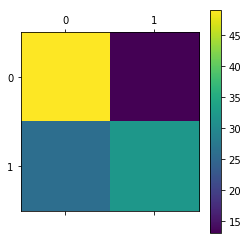

In [331]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(vs_train_norm , vs_target_train)
output = knn.predict(vs_test_norm)
actual = pd.Series(vs_target_test, name ='Actual')
pred = pd.Series(output, name ='Predicted')
df_confusion = pd.crosstab(actual, pred)
plot_confusion(df_confusion)
print "Accuracy Ratio: " + str(get_accuracy_ratio(output))
print(classification_report(actual, pred) )

Predicted  NO  YES
Actual            
NO         52   10
YES        26   32


Accuracy Ratio: 0.7
             precision    recall  f1-score   support

         NO       0.67      0.84      0.74        62
        YES       0.76      0.55      0.64        58

avg / total       0.71      0.70      0.69       120



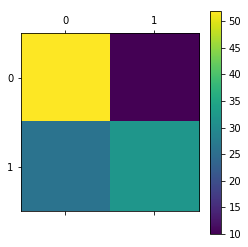

In [332]:
knn = KNeighborsClassifier(n_neighbors=7, weights='uniform')
knn.fit(vs_train_norm , vs_target_train)
output = knn.predict(vs_test_norm)
actual = pd.Series(vs_target_test, name ='Actual')
pred = pd.Series(output, name ='Predicted')
df_confusion = pd.crosstab(actual, pred)
df_confusion = pd.crosstab(actual, pred)
plot_confusion(df_confusion)
print "Accuracy Ratio: " + str(get_accuracy_ratio(output))
print(classification_report(actual, pred) )

Predicted  NO  YES
Actual            
NO         42   20
YES        30   28


Accuracy Ratio: 0.583333333333
             precision    recall  f1-score   support

         NO       0.58      0.68      0.63        62
        YES       0.58      0.48      0.53        58

avg / total       0.58      0.58      0.58       120



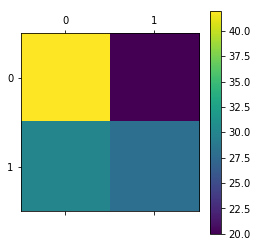

In [333]:
knn = KNeighborsClassifier(n_neighbors=9, weights='distance')
knn.fit(vs_train_norm , vs_target_train)
output = knn.predict(vs_test_norm)
actual = pd.Series(vs_target_test, name ='Actual')
pred = pd.Series(output, name ='Predicted')
df_confusion = pd.crosstab(actual, pred)
df_confusion = pd.crosstab(actual, pred)
plot_confusion(df_confusion)
print "Accuracy Ratio: " + str(get_accuracy_ratio(output))
print(classification_report(actual, pred) )

### k =7 and using the uniform weight paramter yielded the best results 

## C. Repeat Classification Using Scikit-Learn Decision Tree Classifier

In [334]:
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

Predicted  NO  YES
Actual            
NO         47   15
YES        26   32


             precision    recall  f1-score   support

         NO       0.64      0.76      0.70        62
        YES       0.68      0.55      0.61        58

avg / total       0.66      0.66      0.65       120

Accuracy Ratio: 0.658333333333


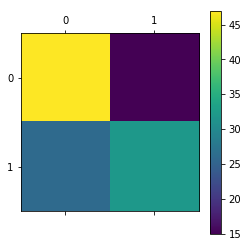

In [335]:
clf = tree.DecisionTreeClassifier()
model = GaussianNB()
clf = model.fit(vs_train_norm, vs_target_train)
output = clf.predict(vs_test_norm)
actual = pd.Series(vs_target_test, name ='Actual')
pred = pd.Series(output, name ='Predicted')
df_confusion = pd.crosstab(actual, pred)
df_confusion = pd.crosstab(actual, pred)
plot_confusion(df_confusion)
print(classification_report(actual, pred) )
print "Accuracy Ratio: " + str(get_accuracy_ratio(output))

### This tells you a good amount about bias-variance tradeoff. You can tell that for higher values of k, this starts to lead to high bias and low variance The decision tree classifer uses the depth of the tree to control the variance.

# D. Discuss Your Observations
### I found that it was difficult to have much control over the built in sklearn functionality since these are predifined libaries. That being said, it would be interesting to explore more with the libraries to see if there are added features to allow pruning and things to avoid overfitting for the decision tree classifiers. The KNN library was easy to use, but it would be interesting to see if you can pass your own distance functions into it. 